### Importing modules

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import os
os.chdir("D:\\Technocolabs Machine Learning Internship\\Minor Project\\Dataset")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
import xgboost as xgb 
from sklearn.metrics import accuracy_score

### Univariate Analysis of Features 

In [2]:
df = pd.read_csv("featureddata.csv")
df.head()

,name,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,status,RPDE,spread1,spread2,D2,PPE
0,phon_R01_S01_1,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,1,0.414783,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,1,0.458359,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,1,0.429895,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,1,0.434969,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,1,0.417356,-3.747787,0.234513,2.332180,0.410335


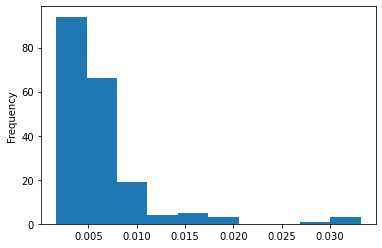

In [3]:
df["MDVP:Jitter(%)"].plot.hist()

Highly Left Skewed Data

Applying Log Transformation when the data is left skewed

In [4]:
df["MDVP:Jitter(%)"] = df["MDVP:Jitter(%)"].transform(np.log)

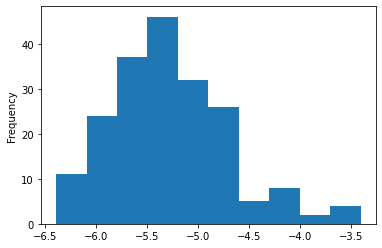

In [5]:
df["MDVP:Jitter(%)"].plot.hist()

Now it is transformed and looks like normal distribution

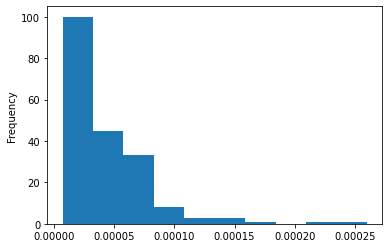

In [6]:
df["MDVP:Jitter(Abs)"].plot.hist ()

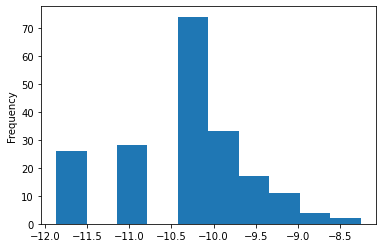

In [7]:
df["MDVP:Jitter(Abs)"]=df["MDVP:Jitter(Abs)"].transform(np.log)
df["MDVP:Jitter(Abs)"].plot.hist ()

Now it is somewhat uniform than earlier 

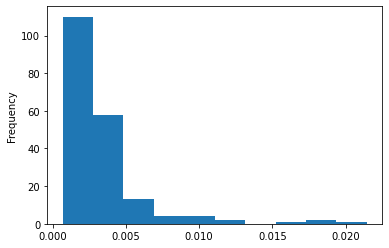

In [8]:
df["MDVP:RAP"].plot.hist()

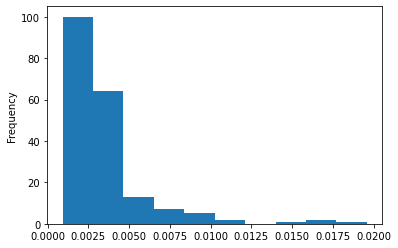

In [9]:
df["MDVP:PPQ"].plot.hist()

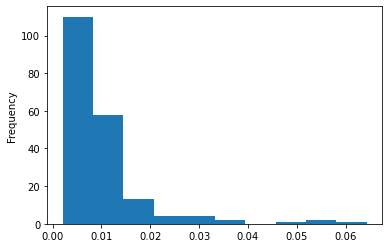

In [10]:
df["Jitter:DDP"].plot.hist()

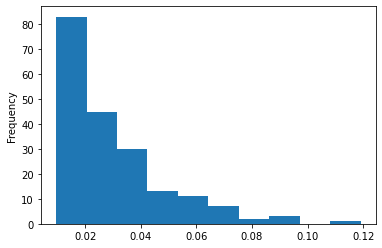

In [11]:
df["MDVP:Shimmer"].plot.hist()

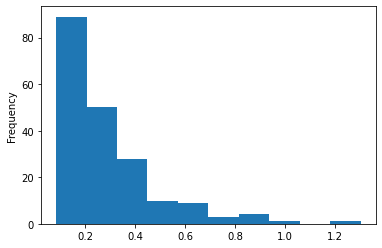

In [12]:
df["MDVP:Shimmer(dB)"].plot.hist()

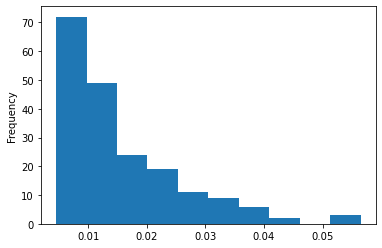

In [13]:
df["Shimmer:APQ3"].plot.hist()

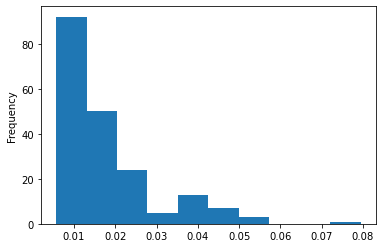

In [14]:
df["Shimmer:APQ5"].plot.hist()

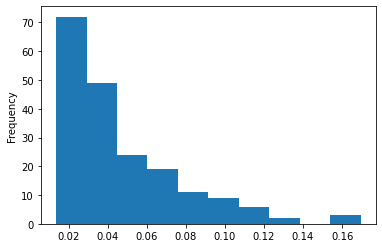

In [15]:
df["Shimmer:DDA"].plot.hist()

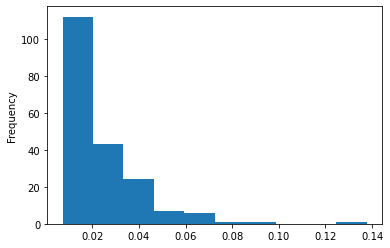

In [16]:
df["MDVP:APQ"].plot.hist()

#### Transforming above features to form uniform distribution

In [17]:
df["MDVP:RAP"]=df["MDVP:RAP"].transform(np.log)
df["MDVP:PPQ"]=df["MDVP:PPQ"].transform(np.log)
df["Jitter:DDP"] = df["Jitter:DDP"].transform(np.log)
df["MDVP:Shimmer"] = df["MDVP:Shimmer"].transform(np.log)
df["MDVP:Shimmer(dB)"] = df["MDVP:Shimmer(dB)"].transform(np.log)
df["Shimmer:APQ3"] = df["Shimmer:APQ3"].transform(np.log)
df["Shimmer:APQ5"] = df["Shimmer:APQ5"].transform(np.log)

In [18]:
df["Shimmer:DDA"] = df["Shimmer:DDA"].transform(np.log)
df["MDVP:APQ"] = df["MDVP:APQ"].transform(np.log)

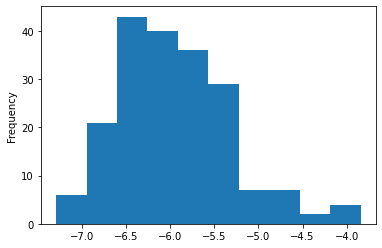

In [19]:
df["MDVP:RAP"].plot.hist()

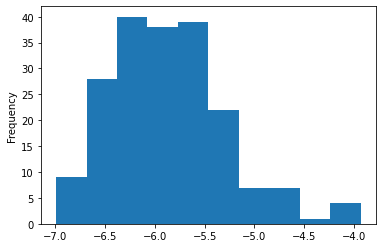

In [20]:
df["MDVP:PPQ"].plot.hist()

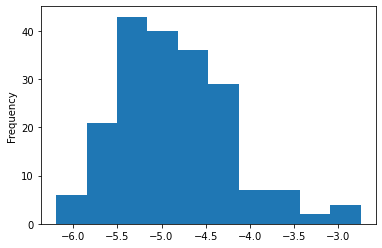

In [21]:
df["Jitter:DDP"].plot.hist()

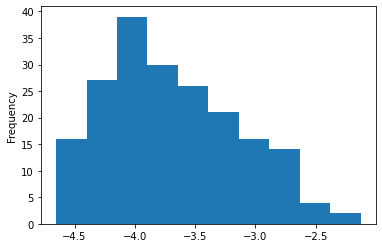

In [22]:
df["MDVP:Shimmer"].plot.hist()

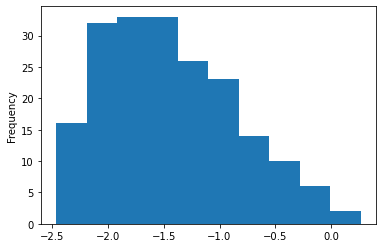

In [23]:
df["MDVP:Shimmer(dB)"].plot.hist()

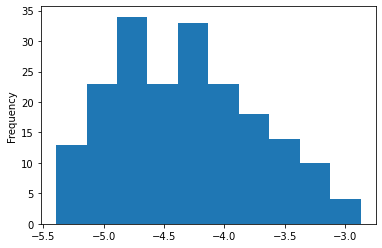

In [24]:
df["Shimmer:APQ3"].plot.hist()

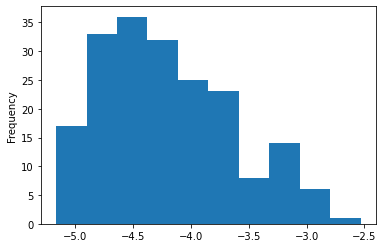

In [25]:
df["Shimmer:APQ5"].plot.hist()

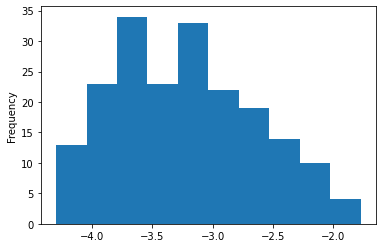

In [26]:
df["Shimmer:DDA"].plot.hist()

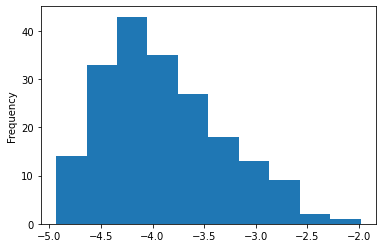

In [27]:
df["MDVP:APQ"].plot.hist()

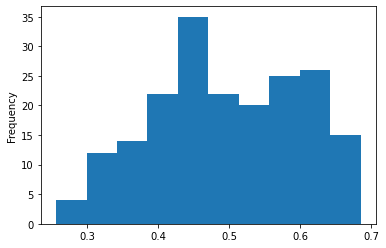

In [28]:
df["RPDE"].plot.hist()

* No need to transform 

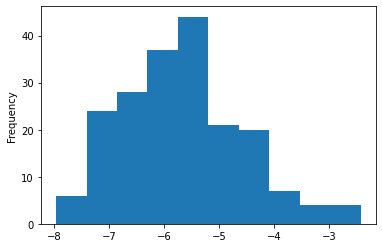

In [29]:
df["spread1"].plot.hist()

- No need to transform, it is more or like a normal distribution curve.

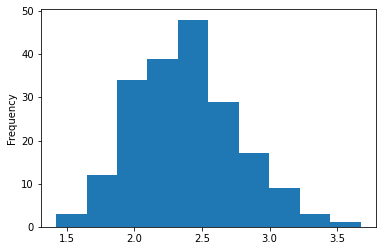

In [30]:
df["D2"].plot.hist()

* This is also a uniform distribution

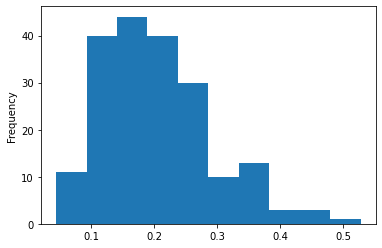

In [31]:
df["PPE"].plot.hist()

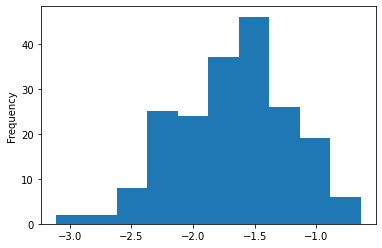

In [32]:
df["PPE"] = df["PPE"].transform(np.log)
df["PPE"].plot.hist()

### Now that we have a uniform distributed features we can build model using these features 

In [33]:
df.head()

,name,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,status,RPDE,spread1,spread2,D2,PPE
0,phon_R01_S01_1,-4.848516,-9.567015,-5.599422,-5.195761,-4.501711,-3.129492,-0.853316,-3.824928,-3.464137,-3.516272,-2.726469,1,0.414783,-4.813031,0.266482,2.301442,-1.256481
1,phon_R01_S01_2,-4.637693,-9.433484,-5.370888,-4.967576,-4.272993,-2.791323,-0.468405,-3.462860,-3.097101,-3.130865,-2.364141,1,0.458359,-4.075192,0.335590,2.486855,-0.997842
2,phon_R01_S01_3,-4.556380,-9.315701,-5.213976,-4.852350,-4.114751,-2.950185,-0.729811,-3.591027,-3.255021,-3.327018,-2.492536,1,0.429895,-4.443179,0.311173,2.342259,-1.100712
3,phon_R01_S01_4,-4.608175,-9.315701,-5.294325,-4.964706,-4.196377,-2.901878,-0.659712,-3.532218,-3.217627,-3.277565,-2.433719,1,0.434969,-4.117501,0.334147,2.405554,-0.997026
4,phon_R01_S01_5,-4.355190,-9.115030,-5.028290,-4.701681,-3.929169,-2.744974,-0.537854,-3.355268,-3.031359,-3.108901,-2.256656,1,0.417356,-3.747787,0.234513,2.332180,-0.890781


In [34]:
# saving dataframe to csv for further use 
df.to_csv("D:\\Technocolabs Machine Learning Internship\\Minor Project\\Dataset\\transformeddata.csv",index=False)

### Data Preprocessing

In [35]:
x = df.drop(["status","name"],axis=1)
y = df["status"]
col = x.columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [36]:
x = pd.DataFrame(x_scaled, columns=col)
x.head()

,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,RPDE,spread1,spread2,D2,PPE
0,0.516486,0.636993,0.490882,0.587129,0.490599,0.603244,0.590614,0.622453,0.646595,0.480463,0.622488,0.369155,0.569875,0.585765,0.390661,0.750510
1,0.587171,0.673934,0.557106,0.661751,0.556873,0.737209,0.731658,0.766212,0.785939,0.610978,0.766304,0.470830,0.703277,0.741337,0.473145,0.855157
2,0.614434,0.706518,0.602576,0.699432,0.602726,0.674276,0.635870,0.715323,0.725985,0.544553,0.715342,0.404416,0.636745,0.686371,0.408819,0.813535
3,0.597068,0.706518,0.579292,0.662689,0.579074,0.693413,0.661557,0.738674,0.740182,0.561300,0.738687,0.416255,0.695627,0.738089,0.436977,0.855487
4,0.681890,0.762032,0.656384,0.748704,0.656501,0.755571,0.706210,0.808931,0.810897,0.618416,0.808968,0.375159,0.762472,0.513798,0.404336,0.898475


In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

            Features     Score
12           spread1  5.832052
9           MDVP:APQ  4.333893
15               PPE  4.218262
5       MDVP:Shimmer  4.178076
6   MDVP:Shimmer(dB)  4.029024
8       Shimmer:APQ5  3.858415
1   MDVP:Jitter(Abs)  3.807486
7       Shimmer:APQ3  3.454705
10       Shimmer:DDA  3.450908
3           MDVP:PPQ  2.959145


In [38]:
features = ["spread1","MDVP:APQ","PPE","MDVP:Shimmer","MDVP:Shimmer(dB)"]

In [39]:
x = x[["spread1","MDVP:APQ","PPE","MDVP:Shimmer","MDVP:Shimmer(dB)"]]

In [40]:
x.head()

,spread1,MDVP:APQ,PPE,MDVP:Shimmer,MDVP:Shimmer(dB)
0,0.569875,0.480463,0.750510,0.603244,0.590614
1,0.703277,0.610978,0.855157,0.737209,0.731658
2,0.636745,0.544553,0.813535,0.674276,0.635870
3,0.695627,0.561300,0.855487,0.693413,0.661557
4,0.762472,0.618416,0.898475,0.755571,0.706210


In [41]:
x.to_csv("D:\\Technocolabs Machine Learning Internship\\Minor Project\\Dataset\\top5feat.csv",index=False)

### Splitting Data 

In [42]:
train_x, test_x, train_y, test_y = tts(x, y, test_size=0.2,random_state=96, stratify=y)

In [43]:
train_x.shape,train_y.shape

((156, 5), (156,))

In [44]:
test_x.shape,test_y.shape

((39, 5), (39,))

### Model Building

In [45]:
temp_model = xgb.XGBClassifier()

temp_model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
temp_train_predict = temp_model.predict(train_x)
temp_test_predict = temp_model.predict(test_x)

temp_train_score = accuracy_score(temp_train_predict, train_y)
temp_test_score = accuracy_score(temp_test_predict, test_y)
print("Training Score : ", temp_train_score)
print("Testing Score : ", temp_test_score)

Training Score :  0.9935897435897436
Testing Score :  0.8461538461538461


* The model performs well on training data but poor on testing data

In [47]:
model = xgb.XGBClassifier(colsample_bytree=0.8,
                          gamma=0,
                          learning_rate=0.5,
                          max_depth=4,
                          min_child_weight=8,
                          n_estimators=100,
                          alpha=10,
                          reg_lambda=0.01,
                          subsample=0.8,
                          seed=40)

model.fit(train_x, train_y)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=4,
              min_child_weight=8, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=40,
              reg_alpha=10, reg_lambda=0.01, scale_pos_weight=1, seed=40,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [48]:
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

train_score = accuracy_score(train_predict, train_y)
test_score = accuracy_score(test_predict, test_y)
print("Training Score : ", train_score)
print("Testing Score : ", test_score)

Training Score :  0.8589743589743589
Testing Score :  0.8461538461538461


* Improved Performance of the model keeping it reliable to use